   meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian
   center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6
        id  week  center_id  meal_id  checkout_price  base_price  \
0  1379560     1         55     1885          136.83      152.29   
1  1466964     1         55     1993          136.83      135.83   
2  1346989     1         55     2539          134.86      135.86   
3  1338232     1         55     2139          339.50      437.53   
4  1448490     1         55     2631          243.50      242.50   

   emailer_for_promotion  homepage_featured  num_orders  
0    

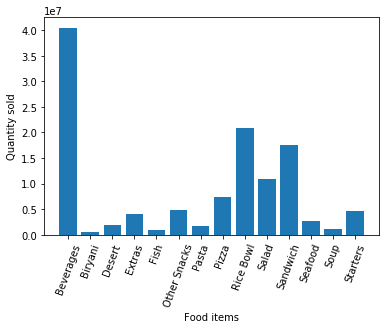

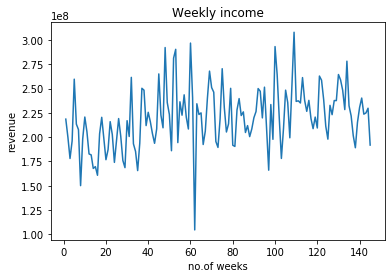

Text(0.5, 1.0, 'Monthly income')

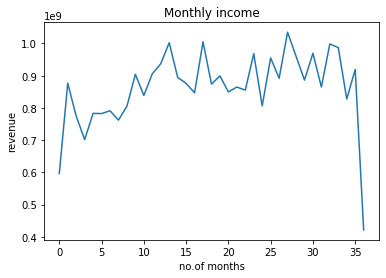

In [6]:
'''Note: 

* Before writing any code remember that this assigment is for helping you understand the basics of file
handling in csv file. 

* This project is designed to have a work flow such that everyone is in same page for this purpose the variables are
given a strict name which should not be changed or modified according to your convinience

* Few of new functions like .head() .xticks().... and concepts may have been introduced in the assingment, so we encourage you
all to go through them without skipping.

*  functions which are to be used in the Your code sections are globally available so try to look for those where you have been prompted
'''

'''Its the data of a meal delivery company which operates in multiple cities. 
They have various fulfillment centers in these cities for dispatching meal orders to their customers.
train.csv: Historical data of demand for a product-center combination 
fulfilment_center_info.csv: Information for fulfillment center like center area, city information etc.
meal_info.csv: Product(Meal) features such as category, sub-category, current price and discount'''


'''START CODE'''

#Import necessary libraries: Numpy,pandas,matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



#read meal_info.csv file from provided dataset into a df_meal named variable
#Note: Proper file directory should be provided

df_meal=pd.read_csv('meal_info.csv')

a=df_meal.head()
print(a)

#read fulfilment_center_info.csv file from provided dataset
#Note: Proper file directory should be provided

df_center=pd.read_csv('fulfilment_center_info.csv')
b=df_center.head()
print(b)
#read train.csv file from provided dataset
#Note: Proper file directory should be provided
df_food=pd.read_csv('train.csv')
c=df_food.head()
print(c)

df_merge1=pd.merge(df_food,df_center,on='center_id')
df=pd.merge(df_merge1,df_meal,on='meal_id')
print(df)

table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)
print(table)




#bar graph
rx = table.num_orders
ry = table.index
plt.figure(1)
plt.bar(ry,rx)
plt.xlabel('Food items')
plt.ylabel('Quantity sold')


#xticks 
plt.xticks(rotation=70) 
#the labesls for types on x-axis were tilted to 70 degrees for the bar plot to be clear as there are large no.of items on the axis.

#x-axis labels 


#y-axis labels 


#plot title 


#save plot 


#display 

revenue=df.checkout_price*df.num_orders
month=df.week//4
df['revenue']=revenue
df['month']=month
df

#list to store week-wise revenue 
table1 = pd.pivot_table(data=df,index='week',values='revenue',aggfunc=np.sum)
table2 = pd.pivot_table(data=df,index='month',values='revenue',aggfunc=np.sum)
plt.figure(2)
plt.plot(table1.index,table1.revenue)
plt.xlabel('no.of weeks')
plt.ylabel('revenue')
plt.title('Weekly income')
plt.show()
plt.figure(3)
plt.plot(table2.index,table2.revenue)
plt.xlabel('no.of months')
plt.ylabel('revenue')
plt.title('Monthly income')